# [ 다이아몬드 가격 예측 ]

### 데이터 컬럼 설명

- carat : 캐럿 (중량) 
| 다이아몬드 캐럿은 다이아몬드의 무게를 측정합니다         
| 0.2 ~ 5.01

- cut : 컷팅 
| 다이아몬드 컷은 다이아몬드의 면이 빛과 얼마나 잘 상호 작용하는지를 의미합니다               
| (하) Fair, Good, Very Good, Premium, Ideal (상)             

- color : 색 
| 화학적으로 순수하고 구조적으로 완벽한 다이아몬드는 순수한 물 한 방울과 같은 색조가 없으므로 결과적으로 더 높은 가치가 있습니다. (D~Z)             
| (상) D E F G H I J  (하)

- clarity : 투명도 
| 다이아몬드 선명도는 내포물 및 흠이 없음을 나타냅니다. (I1~IF)            
| (상) IF , VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (하)

- depth : total depth percentage 계산식 = z / mean(x, y) 
| [ 2 * z / (x + y) ]               
| 43 ~ 79

- table : 다이아몬드 테이블 
| width of top of diamond relative to widest point(%)          
| 43 ~ 95

- price : 가격 
| 단위 $             
| 326 ~ 18823

- x : 측정 길이 length 
| 단위 mm          
| 3.73 ~ 10.74

- y : 측정 너비 width
| 단위 mm             
| 3.68 ~ 58.9

- z : 측정 깊이 depth
| 단위 mm              
| 1.07 ~ 31.8

> 설명 출처 : https://4cs.gia.edu/en-us/diamond-cut/

# [ 다이아몬드 데이터 파악하기 ]

## 환경 Setting (패키지 다운로드)

In [1]:
# import
import pandas as pd
import numpy as np

# 그래프
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

---

## 데이터 불러오기 , 정보 확인

In [3]:
diamonds = pd.read_csv("DiamondsPrices2022.csv")
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


> 이상한 컬럼 Unnamed: 0 존재 확인        
인덱스 데이터로 추정된다. 어떤 데이터 인지 확인하고 의미없는 데이터 일시 삭제한다.

In [4]:
diamonds['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53938    53939
53939    53940
53940    53941
53941    53942
53942    53943
Name: Unnamed: 0, Length: 53943, dtype: int64

> Unnamed는 인덱스 데이터로 확인 Drop한다

In [5]:
diamonds.drop("Unnamed: 0", axis= 1 , inplace = True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### info 로  데이터 null , Data  Type, row 갯수 등을 확인한다

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


> row갯수와 non-null의 갯수가 같으므로 null값이 없는걸로 확인          
> 53943개의 row를 가지고 있다            
> 각 컬럼의 성격에 맞는 데이터 타입(dtype)이 알맞게 되어 있다        

### 수치형 데이터 확인하기 (Describe) 

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 타겟인 가격을 빼고 나머지 컬럼은 평균과 중앙값이 비슷하다 (-> 정규분포로 봐도 될까?)            
> x , y , z 컬럼은 측정 데이터인데 최소값에 0이 보인다 -> null값과 다를바 없다고 판단. 0 값 정제가 필요하다.            

### 카테고리형 데이터 확인하기

In [8]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


> 데이터 성격에 맞는 데이터로 잘 들어가 있다

### 카테고리 컬럼 빈도수 확인

In [9]:
colums = ['cut' , 'color' , 'clarity']
for col in colums:
   print("Column :", col)
   print(diamonds[col].value_counts().sort_values())
   print("--------------------------------")

Column : cut
Fair          1610
Good          4906
Very Good    12083
Premium      13793
Ideal        21551
Name: cut, dtype: int64
--------------------------------
Column : color
J     2808
I     5422
D     6775
H     8304
F     9543
E     9799
G    11292
Name: color, dtype: int64
--------------------------------
Column : clarity
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12259
SI1     13067
Name: clarity, dtype: int64
--------------------------------


> Q ) 카테고리형 컬럼을 원핫인코딩으로 정제하는게 좋을지 , 단계별 숫자를 할당 (ex 'Ideal' 'Premium' 'Good' 'Very Good' 'Fair' : 5,4,3,2,1) 해서 하는게 좋을지 어떻게 판단하나요?      
> A ) 순서에 의미가 있으면 숫자로 변환하면 된다. 0이 아닌 1부터 시작하는게 좋다. 순서에 의미가 없는 성별 같은 범주형데이터는 원핫인코딩을 해야한다.

데이터 확인 End

---

## 데이터 정제

### x, y, z 컬럼의 0 데이터 갯수 확인 및 삭제

In [10]:
# diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)] # 출력 확인
len(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index)

20

> 0값 데이터 20개이다. 원 데이터 5만4천개에 영향이 미미할 정도로 갯수가 적고 , 다른 곳에서 계산할만한 자료가 없으므로 삭제한다

In [11]:
# 0 데이터 삭제
diamonds.drop(diamonds[(diamonds['x'] == 0) |(diamonds['y'] == 0) |(diamonds['z'] == 0)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### 정제 후 다시 수치형 데이터 확인

In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,61.749432,57.456902,3930.927879,5.731628,5.734888,3.540042
std,0.473783,1.432336,2.234123,3987.179153,1.119392,1.140094,0.702511
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


> 20개 데이터가 삭제 되어 53923 rows × 10 columns             
> 데이터를 정제해도 평균과 중앙값이 비슷하다       

In [13]:
# 원 데이터 보존을 위해 데이터 변환용 복사
diamondsV2 = diamonds.copy()

### 카테고리 컬럼 수치형으로 변환하기
- Cut, Color, Clarity

In [14]:
diamondsV2['cut'] = diamondsV2['cut'].map({"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5})
diamondsV2['color'] = diamondsV2['color'].map({"D" : 7 ,"E" : 6 ,"F" : 5 ,"G" : 4 , "H" : 3 , "I" : 2 , "J" : 1})
diamondsV2['clarity'] = diamondsV2['clarity'].map({"IF" : 8 , "VVS1" : 7 , "VVS2" : 6 , "VS1" : 5 , "VS2" : 4 , "SI1" : 3 , "SI2" : 2 , "I1" : 1})

In [15]:
# 변환 확인
diamondsV2.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


#### 변환 데이터 백업

In [16]:
diamondsV2.to_csv("diamonds_new.csv", index=False)

### 데이터 정규화 , 표준화 하는법

수치형 데이터를 머신러닝, 딥러닝에 사용하기 위해서는 정규화, 표준화가 필요하다.             

다이아몬드 데이터의 경우          
- 같은 단위로 측정한 컬럼 (X , Y , Z , mm) 는 한번에 같이 스케일(정규화) 하면 된다.           
- Depth는 x,y,z 데이터로 계산한 계산식이 있기 때문에 정규화한 x,y,z데이터로 다시 계산하여 정규화ver Depth컬럼을 만든다.              
- Table은 계산식이 없고, Percentage 데이터이기 때문에 100으로 나눠 정규화 한다.            
- Carat은 계산식이나, 같은 단위의 컬럼이 없기 때문에 (min,max) 정규화를 해준다. (보통 max로 많이 한다)            

데이터 정제 End

---

## 데이터 시각화

좋음 - 나쁨 순서 Order List

In [17]:
cut_order = [ "Ideal" , "Premium" , "Very Good" , "Good", "Fair"]
color_order = ["D", "E", "F", "G", "H", "I", "J"]
clarity_order = ["IF", "VVS1", "VVS2" , "VS1" , "VS2" , "SI1" , "SI2", "I1"]

### 전체 컬럼에 대한 PairPlot

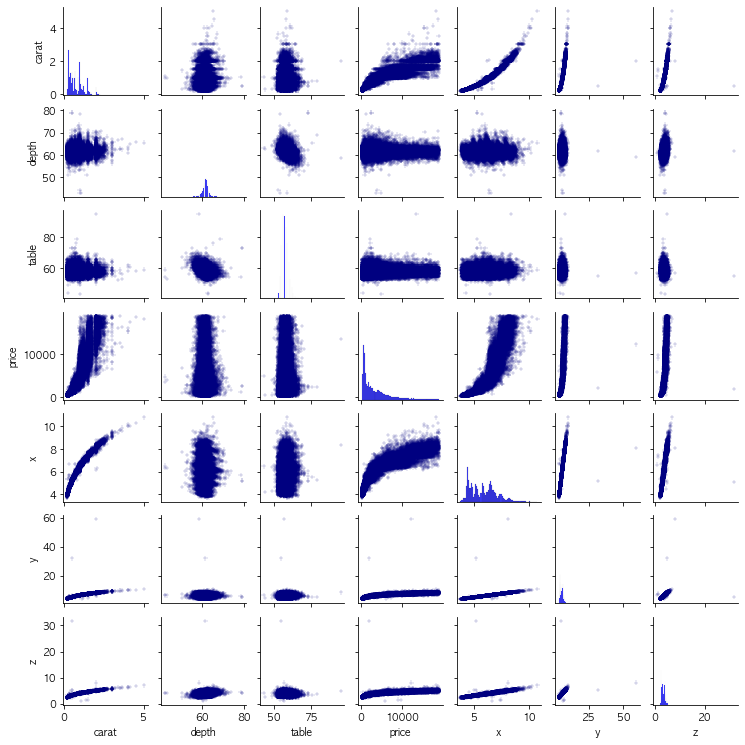

In [18]:
sns.pairplot(
    diamonds,
    plot_kws = dict(marker = "+", alpha = 0.5, color = 'navy' , size = 0.1), 
    diag_kws = dict(color = 'blue'),
    height= 1.5,
    # hue= 'color',
    # hue_order = color_order,
    # palette = ,
    )

plt.show()

### BoxPlot (상자수염 그래프) - 컬럼별로 확인

> [ 이상치 확인 ]         
> 박스 밖에 연속적으로 있다면 이상치가 아니다. 박스 사이즈 길이 보다 멀리 떨어져 있으면 이상치 이다.

In [19]:
# 테마 설정
sns.set_theme(style="whitegrid", palette="Pastel1")

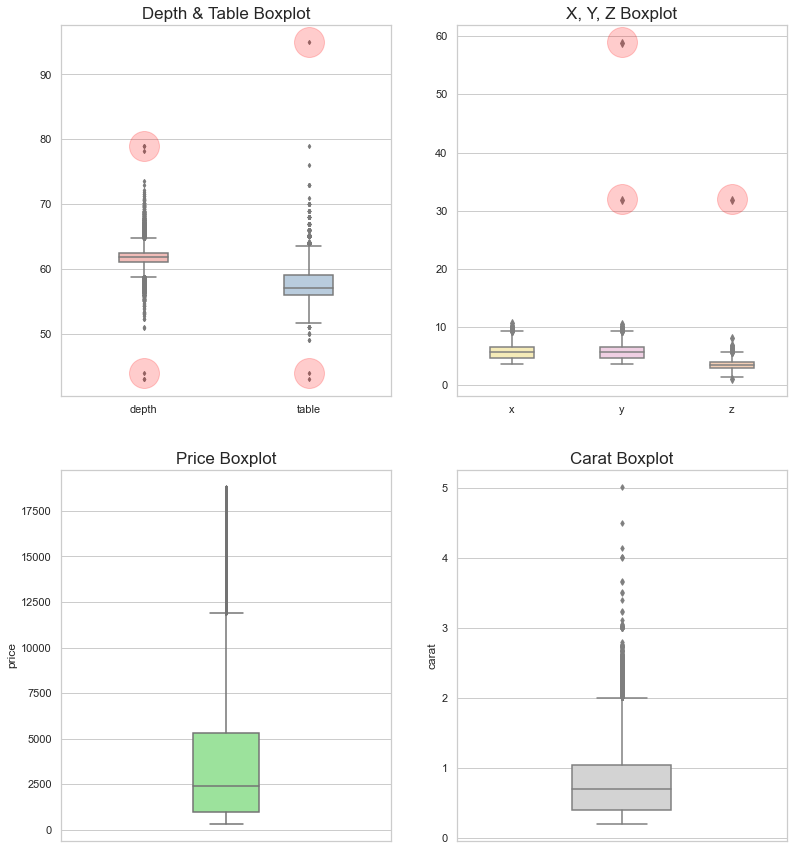

In [20]:
fig = plt.figure(figsize=(13,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    # color= 'skyblue',
    width= 0.3,
    fliersize= 3
) 
# 이상치 표시
ax1.plot([0,0,1,1] , [79,44,95,44] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" )

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    palette= 'Pastel2_r',
    width= 0.4,
) 
# 이상치 표시
ax2.plot([2,1,1] , [32,32,59] , marker = 'o' , color = 'red' , markersize = 30 , alpha = 0.2 , ls = "" ) #, markerfacecolor = "white"

sns.boxplot(
    y = diamonds['price'],
    ax = ax3,
    color= 'lightgreen',
    width= 0.2,
    fliersize= 2
) 

sns.boxplot(
    y = diamonds['carat'],
    ax = ax4,
    color= 'lightgray',
    width= 0.3,
    fliersize= 4
) 

ax1.set_title('Depth & Table Boxplot' , size = 17)
ax2.set_title('X, Y, Z Boxplot' , size = 17)
ax3.set_title('Price Boxplot' , size = 17)
ax4.set_title('Carat Boxplot' , size = 17)
plt.show()

> 몇 컬럼에서 이상치 제거가 필요하다          
> depth (48~75) , table (45~80) , y (0~20) , z (0~10)

### 이상치 제거

In [21]:
diamonds.drop(diamonds[(diamonds['depth'] < 48) | (diamonds['depth'] > 75)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['table'] < 45) | (diamonds['table'] > 80)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['y'] > 20)].index , inplace= True)
diamonds.drop(diamonds[(diamonds['z'] > 10)].index , inplace= True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


> 12개 삭제 되었다

In [22]:
# 카테고리컬럼 정제한 데이터도 이상치 제거
diamondsV2.drop(diamondsV2[(diamondsV2['depth'] < 48) | (diamondsV2['depth'] > 75)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['table'] < 45) | (diamondsV2['table'] > 80)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['y'] > 20)].index , inplace= True)
diamondsV2.drop(diamondsV2[(diamondsV2['z'] > 10)].index , inplace= True)

### 이상치 제거 후 박스플랏

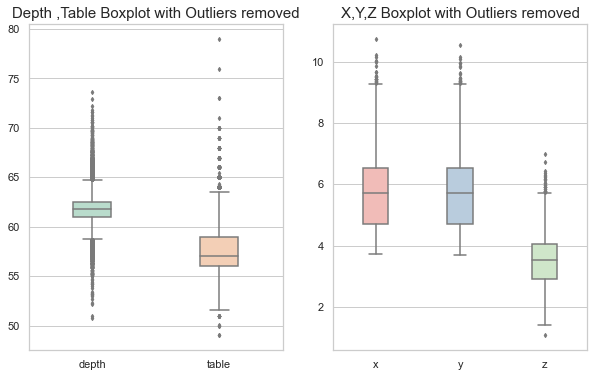

In [23]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(
    data = diamonds[['depth','table']],
    ax = ax1,
    width= 0.3,
    fliersize= 3,
    palette= 'Pastel2'
) 

sns.boxplot(
    data = diamonds[['x','y','z']],
    ax = ax2,
    width= 0.3,
    fliersize= 3
) 

ax1.set_title('Depth ,Table Boxplot with Outliers removed' , size = 15)
ax2.set_title('X,Y,Z Boxplot with Outliers removed' , size = 15)
plt.show()

### 카테고리 컬럼 등급별 데이터 갯수(value count) 확인

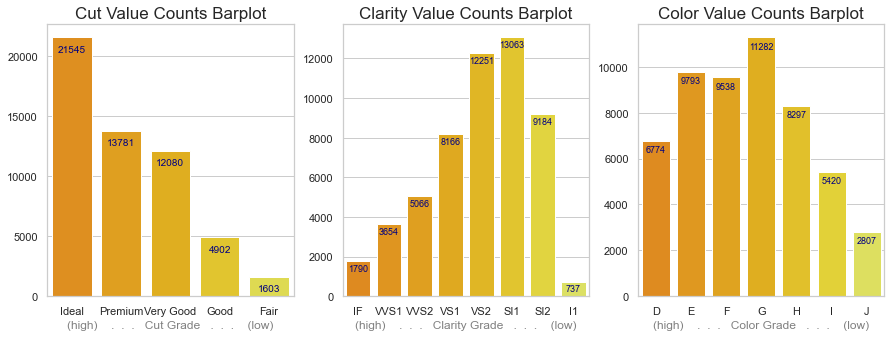

In [24]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.barplot(
    x = diamonds['cut'].value_counts().index,
    y = diamonds['cut'].value_counts().to_numpy(),
    order = cut_order,
    palette = "Wistia_r",
    ax = ax1
)
sns.barplot(
    x = diamonds['clarity'].value_counts().index,
    y = diamonds['clarity'].value_counts().to_numpy(),
    order = clarity_order,
    palette = "Wistia_r",
    ax = ax2
)
sns.barplot(
    x = diamonds['color'].value_counts().index,
    y = diamonds['color'].value_counts().to_numpy(),
    order = color_order,
    palette = "Wistia_r",
    ax = ax3
)

# 그래프 제목 , 축
ax1.set_title("Cut Value Counts Barplot", size = 17)
ax2.set_title("Clarity Value Counts Barplot", size = 17)
ax3.set_title("Color Value Counts Barplot", size = 17)
ax1.set_xlabel("(high)    .  .  .   Cut Grade   .  .  .    (low)" , color = 'gray' , size = 12)
ax2.set_xlabel("(high)    .  .  .   Clarity Grade   .  .  .    (low)", color = 'gray' , size = 12)
ax3.set_xlabel("(high)    .  .  .   Color Grade   .  .  .    (low)", color = 'gray' , size = 12)

# 그래프에 글자 출력용 리스트,딕셔너리
cut_vl = diamonds['cut'].value_counts().to_list()
clarity_vd = diamonds['clarity'].value_counts().to_dict()
color_vd = diamonds['color'].value_counts().to_dict()
clarity_vl = []
color_vl = []
axlist = [(ax2 ,clarity_vd,clarity_order), (ax3, color_vd , color_order)]

# 그래프에 텍스트 값 출력
for index , value in enumerate(cut_vl): # ax1
    ax1.annotate(value , xy = (index , value-1200), color='navy', ha="center" ,va = 'baseline',fontsize = 10)
for ax in axlist: # ax2 , ax3
    for index , value in enumerate(ax[2]): # ax[1] : dict , ax[2] : order -> 등급순으로 출력하기 위함
        ax[0].annotate(ax[1][value] , xy = (index , ax[1][value]-500), color='navy', ha="center" , va = 'baseline',fontsize = 9)
        if ax[0] == ax2:
            clarity_vl.append(ax[1][value])
        else:
            color_vl.append(ax[1][value])

plt.show()

### 카테고리 컬럼별 Value Counts를 비율로 보기 위한 PiePlot 

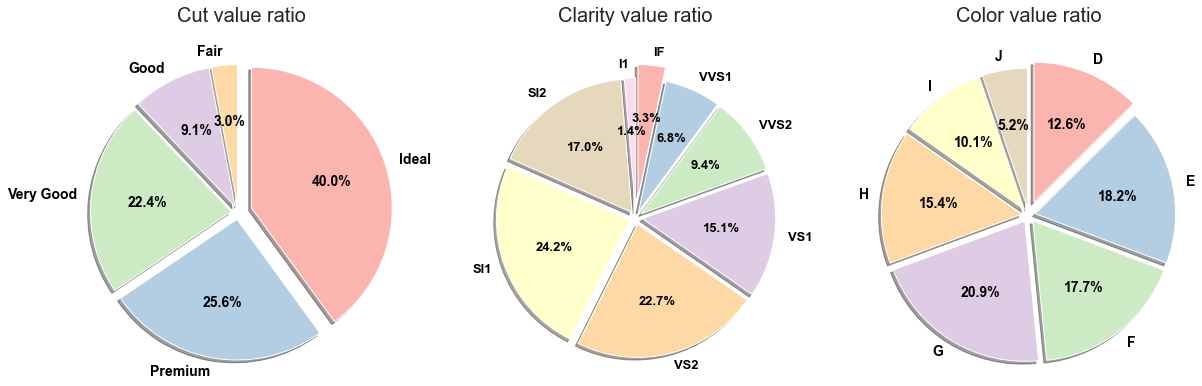

In [25]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(
    cut_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.10, 0.05, 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 14 , fontweight = 'bold'),
    labels = cut_order,
    )
ax2.pie(
    clarity_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.15, 0.05, 0.05, 0.05 , 0.05, 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 13 , fontweight = 'bold'),
    labels = clarity_order,
    )
ax3.pie(
    color_vl,
    autopct = '%.1f%%',
    startangle = 90, # 시작 각도
    counterclock = False,
    explode = [0.10, 0.05, 0.05, 0.05 , 0.05, 0.05 , 0.05],
    shadow = True,
    textprops = dict(color = 'black', fontsize = 14 , fontweight = 'bold'),
    labels = color_order,
    )

ax1.set_title('Cut value ratio\n' , size = 20)
ax2.set_title('Clarity value ratio\n' , size = 20)
ax3.set_title('Color value ratio\n' , size = 20)
ax1.axis('equal') 
ax2.axis('equal') 
ax3.axis('equal') 

plt.show()

> Cut의 경우 최상급 등급의 40% 상위 두 등급으로 보면 60% 이상 차지하고 있어 등급의 상향평준화로 보인다.          
> 따라서 등급별로 가격 차등 구분이 불분명할 것으로 추측된다.          
> Color 컬럼이 그나마 가장 고르게 분포되어 보인다.

> 가격 예측에 피쳐 컬럼으로 Cut은 사용하지 않을 가능성이 높아 보인다             
> 사람의 손으로 다룰 수 있는 것은 상향 평준화, 다이아몬드 자체의 색이나, 불순도는 사람이 컨트롤 할 수 없기 때문에 다양하게 있는 것으로 생각해 볼 수 있다.

### 가격 비교 그래프

#### 가격 - [ Cut / Clarity / Color ] KDE plot (밀도)

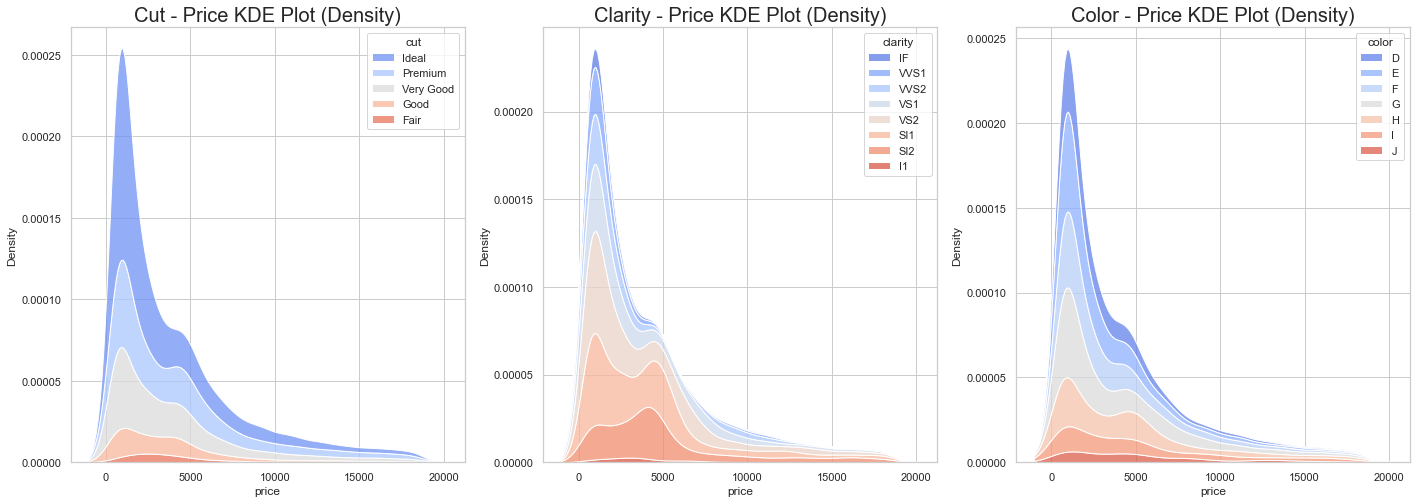

In [26]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="cut", 
    multiple="stack",
    hue_order= cut_order,
    ax = ax1,
    palette='coolwarm',
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="clarity", 
    multiple="stack",
    hue_order= clarity_order,
    ax = ax2,
    palette='coolwarm',
    )

sns.kdeplot(
    data=diamonds, 
    x="price", 
    hue="color", 
    multiple="stack",
    hue_order= color_order,
    ax = ax3,
    palette='coolwarm',
    )
    
ax1.set_title('Cut - Price KDE Plot (Density)' , size = 20 )
ax2.set_title('Clarity - Price KDE Plot (Density)', size = 20)
ax3.set_title('Color - Price KDE Plot (Density)', size = 20)
plt.show()

> 전체적으로 낮은 가격에 데이터가 몰려있다.               
> 등급별로 가격의 범위가 나눠지는걸 예상했지만 예상과 달리 모든 등급이 비슷한 가격 범위를 보이고 있다.             

#### 캐럿 - [ Cut / Clarity / Color ] Violin Plot

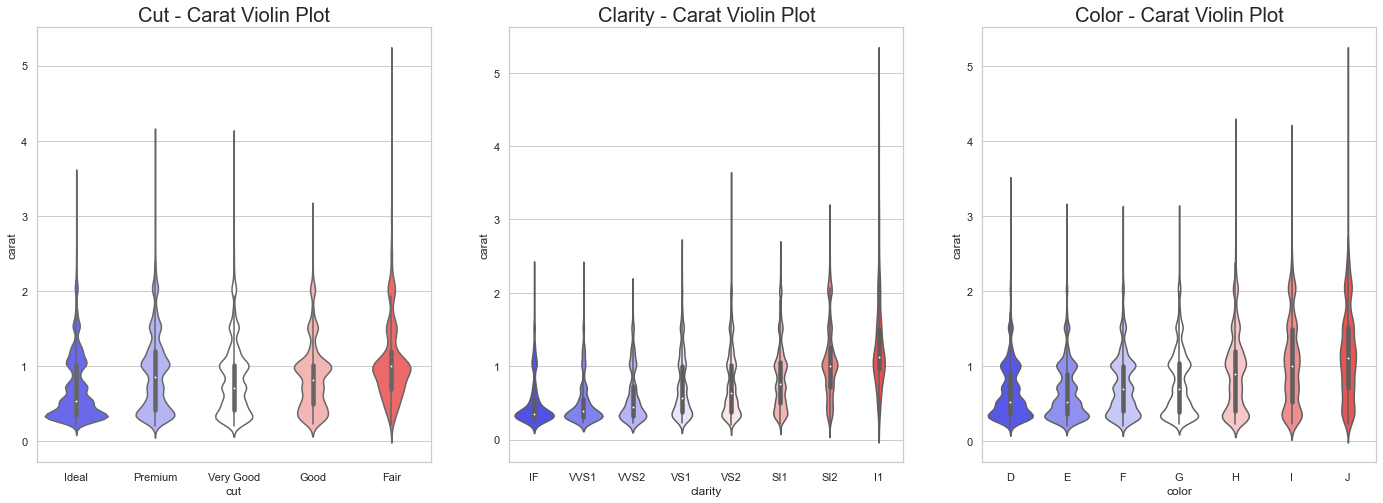

In [27]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.violinplot(
    'cut',
    'carat',
    data = diamonds,
    # alpha=0.2,
    order= cut_order,
    ax=ax1,
    palette= 'bwr',
)
sns.violinplot(
    'clarity',
    'carat',
    data = diamonds,
    # alpha=0.8,
    order= clarity_order,
    ax=ax2,
    palette= 'bwr',
)
sns.violinplot(
    'color',
    'carat',
    data = diamonds,
    # alpha=1,
    order= color_order,
    ax=ax3,
    palette= 'bwr',
)

ax1.set_title('Cut - Carat Violin Plot' , size = 20)
ax2.set_title('Clarity - Carat Violin Plot', size = 20)
ax3.set_title('Color - Carat Violin Plot', size = 20)
plt.show()

> 전반적으로 높은 등급은 작은 캐럿 사이즈에 많이 몰려있고, 낮은 등급들이 캐럿 사이즈가 큰 추세를 보인다. 

#### 캐럿 - 가격 산점도

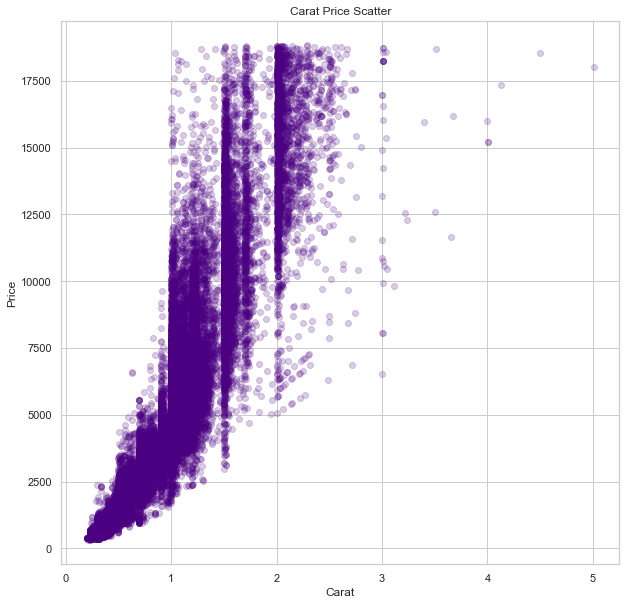

In [28]:
plt.figure(figsize = (10,10))
plt.scatter(
    'carat',
    'price',
    data = diamonds,
    alpha=0.2,
    color = "indigo",
)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Carat Price Scatter")
plt.show()

> 캐럿과 가격의 상관관계가 높아 보인다.                     
> 위의 그래프와 같이 보면 높은 등급이어도 캐럿이 작으면 가격이 낮고, 낮은 등급이어도 캐럿 사이즈가 훨씬 크게 되면 가격이 비싸지게 된다.         
> 따라서 캐럿이 반영되지 않은 그래프로는 등급별 가격을 확인할 수 없다.        

#### Price Per Carat (1캐럿 당 가격)와 카테고리 컬럼들

Price per Carat 컬럼 생성

In [29]:
diamonds_2 = diamonds.copy()
diamonds_2['pricepercarat'] = round(diamonds_2['price']/diamonds_2['carat'])
diamonds_2 = diamonds_2.astype({'pricepercarat' : 'int64'})
diamonds_2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,pricepercarat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1422
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1152
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1081


> Price per Carat 컬럼은 그래프를 그리기 위한 컬럼이기 때문에 사본 데이터를 만들어 컬럼을 추가한다.                   
> (타겟 컬럼인 Price가 들어가 있기 때문에 분석에는 사용하지 못한다)

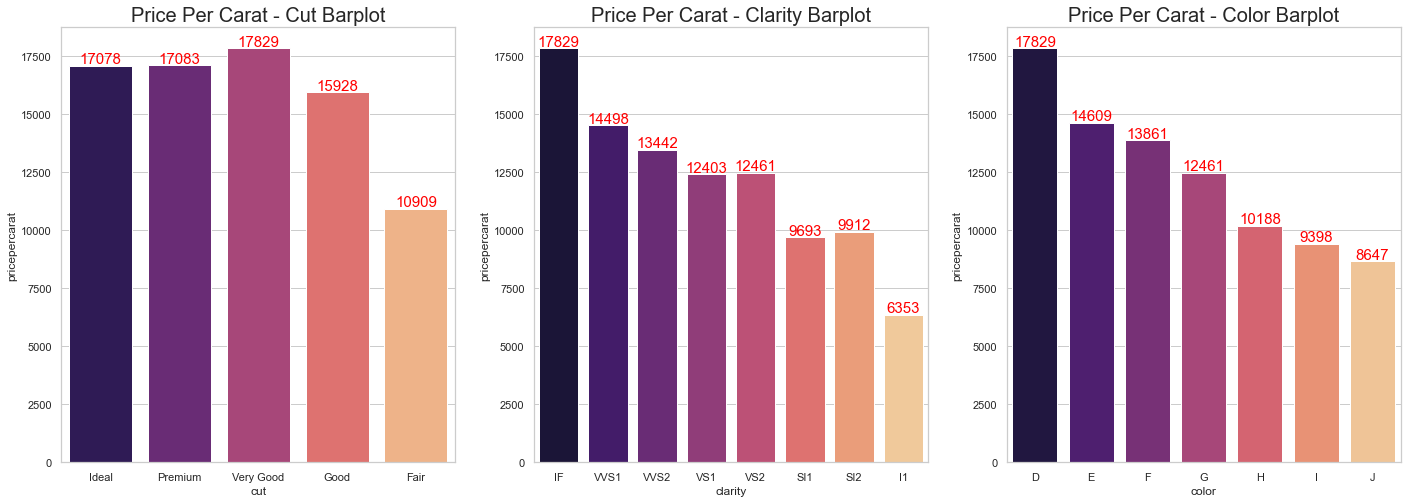

In [30]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x = 'cut',
    y = 'pricepercarat',
    data = diamonds_2,
    order = cut_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax1,
)
sns.barplot(
    x = 'clarity',
    y = 'pricepercarat',
    data = diamonds_2,
    order = clarity_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax2,
)
sns.barplot(
    x = 'color',
    y = 'pricepercarat',
    data = diamonds_2,
    order = color_order,
    palette = "magma",
    estimator = lambda x: x.max(),
    ci = None, # remove error bar
    ax=ax3,
)
ax1.set_title('Price Per Carat - Cut Barplot' , size = 20)
ax2.set_title('Price Per Carat - Clarity Barplot' , size = 20)
ax3.set_title('Price Per Carat - Color Barplot', size = 20)

# 그래프에 값 출력
cut_max = diamonds_2[['pricepercarat','cut']].groupby('cut').max()
clarity_max = diamonds_2[['pricepercarat','clarity']].groupby('clarity').max()
color_max = diamonds_2[['pricepercarat','color']].groupby('color').max()

for index , value in enumerate(cut_order):
    ax1.annotate( cut_max.loc[value,'pricepercarat'] , xy = (index , cut_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
for index , value in enumerate(clarity_order):
    ax2.annotate(clarity_max.loc[value,'pricepercarat'] , xy = (index , clarity_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
for index , value in enumerate(color_order):
    ax3.annotate(color_max.loc[value,'pricepercarat'] , xy = (index , color_max.loc[value,'pricepercarat']+100), color='red', ha="center" ,va = 'baseline',fontsize = 15)
 
plt.show()

> 단위 캐럿 가격 최대값을 비교 했을 때 투명도와 색상 컬럼은 등급이 좋을 수록 가격이 높아지는 추세를 보인다.              
> 하지만 컷팅의 경우 상위 3등급은 가격 구분이 뚜렷히 보이지 않는다.            

### carat - [cut / clarity / color] 중 두번 분류해서 막대 그래프 그리기

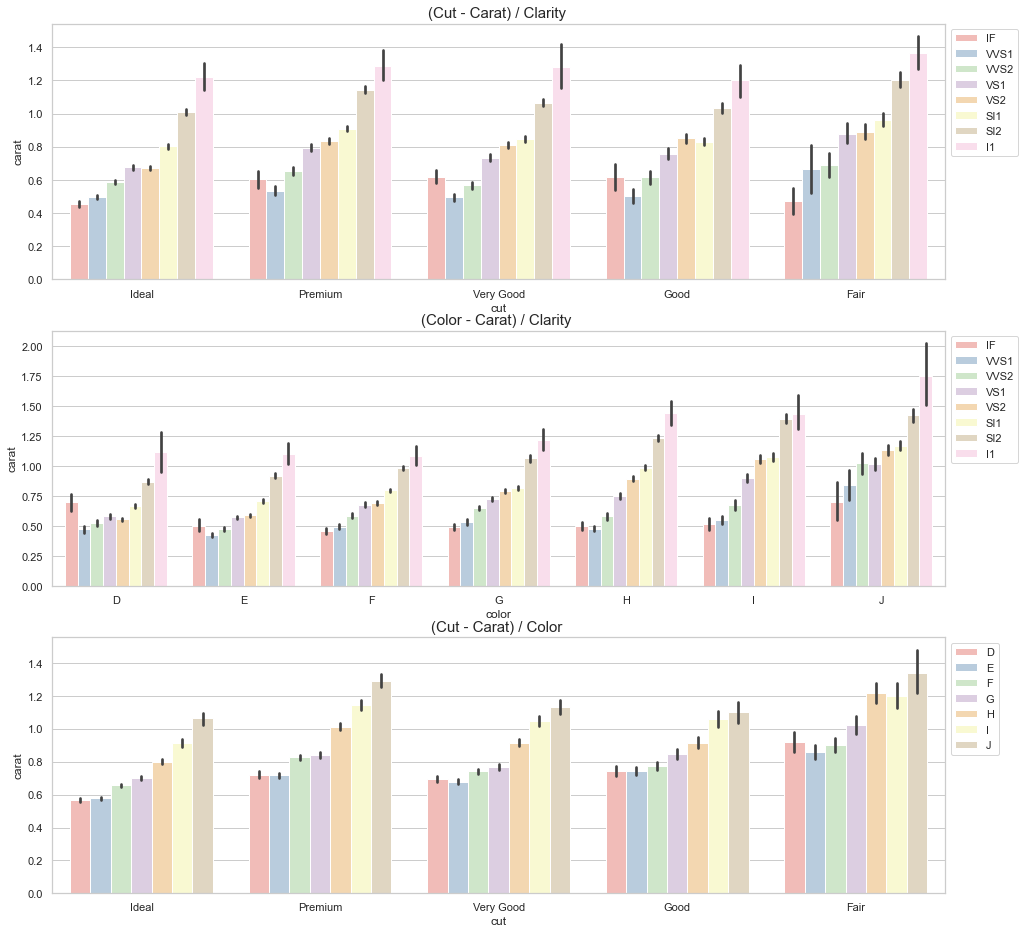

In [31]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

sns.barplot(
    x = 'cut',
    y = 'carat',
    hue = 'clarity',
    data= diamonds,
    order = cut_order,
    hue_order = clarity_order,
    ax = ax1,
)
sns.barplot(
    x = 'color',
    y = 'carat',
    hue = 'clarity',
    data= diamonds,
    order = color_order,
    hue_order = clarity_order,
    ax = ax2,
)
sns.barplot(
    x = 'cut',
    y = 'carat',
    hue = 'color',
    data= diamonds,
    order = cut_order,
    hue_order = color_order,
    ax = ax3,
)
ax1.legend( bbox_to_anchor=(1.0, 1.0))
ax2.legend( bbox_to_anchor=(1.0, 1.0))
ax3.legend( bbox_to_anchor=(1.0, 1.0))
ax1.set_title("(Cut - Carat) / Clarity " , size = 15)
ax2.set_title("(Color - Carat) / Clarity " , size = 15)
ax3.set_title("(Cut - Carat) / Color " , size = 15)
plt.show()

> 등급 조합이 높을 수록 사이즈가 작아지고, 등급 조합이 낮아질 수록 캐럿의 최대 사이즈도 커진다.
                
> 등급이 낮으면서 캐럿까지 작으면 상품가치가 없기 때문에 낮은 등급은 큰 사이즈 캐럿이 주로 나오는 것으로 생각해 볼 수 있다 ( 추측 )

### 다이아몬드 전체 데이터 상관계수 히트맵

카테고리 데이터도 상관계수 분석을 위해 수치로 변환한 데이터를 사용한다

In [32]:
diamondsV2.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134938,-0.291326,-0.352698,0.029260,0.181783,0.921594,0.977777,0.976860,0.976524
cut,-0.134938,1.000000,0.020719,0.189083,-0.219424,-0.433960,-0.053492,-0.126230,-0.125872,-0.152288
color,-0.291326,0.020719,1.000000,-0.025804,-0.049065,-0.027009,-0.172392,-0.270607,-0.270413,-0.274968
clarity,-0.352698,0.189083,-0.025804,1.000000,-0.067869,-0.160655,-0.146738,-0.372835,-0.367502,-0.376385
depth,0.029260,-0.219424,-0.049065,-0.067869,1.000000,-0.302260,-0.010287,-0.024419,-0.027560,0.097600
table,0.181783,-0.433960,-0.027009,-0.160655,-0.302260,1.000000,0.127057,0.196309,0.190129,0.155802
price,0.921594,-0.053492,-0.172392,-0.146738,-0.010287,0.127057,1.000000,0.887218,0.888812,0.882165
x,0.977777,-0.126230,-0.270607,-0.372835,-0.024419,0.196309,0.887218,1.000000,0.998657,0.991122
y,0.976860,-0.125872,-0.270413,-0.367502,-0.027560,0.190129,0.888812,0.998657,1.000000,0.990781
z,0.976524,-0.152288,-0.274968,-0.376385,0.097600,0.155802,0.882165,0.991122,0.990781,1.000000


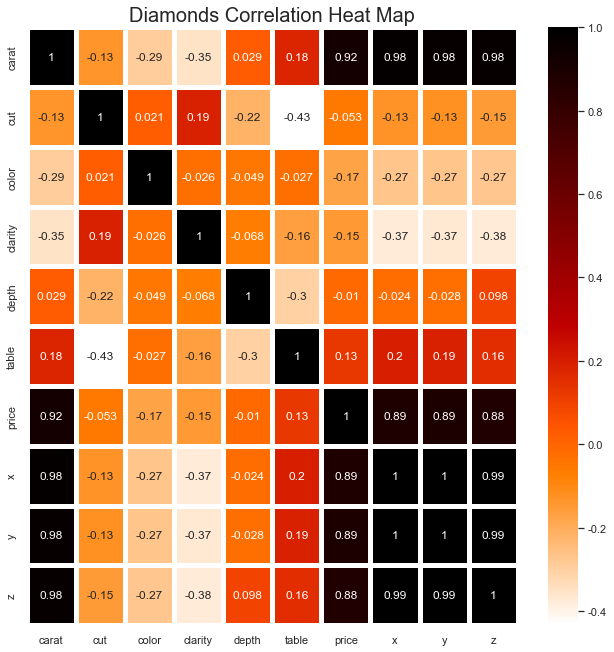

In [33]:
plt.figure(figsize=(11,11))
sns.heatmap(
    diamondsV2.corr(), # data
    annot= True, # 숫자 표기
    linewidths= 5, # 간격
    cmap = 'gist_heat_r',
    cbar= True , # 컬러바
)
plt.title("Diamonds Correlation Heat Map" , size = 20)
plt.show()

> 타겟인 가격과 carat의 상관계수가 가장 높고, carat과 상관관계가 높은 x,y,z가 그 다음으로 가격과 상관계수가 높다.                  
> 그 외 컬럼들은 유의미한 관계가 보이지 않지만 선형회귀를 사용하는 것이 아니고 머신러닝을 돌리기 때문에 모든 컬럼을 후보로 두어 분석을 시작한다.                  

시각화 End

---

# [ 머신러닝 ] 

#### 피쳐 컬럼들의 평균과 중앙값이 비슷하기 때문에 정규화를 하지 않고 머신러닝 만들어 본다

In [34]:
# 정규화 코드
# diamonds_sc = diamondsV2.copy()

# diamonds_sc['table'] = diamonds_sc['table'] / 100
# diamonds_sc['carat'] = diamonds_sc['carat'] / diamonds_sc['carat'].max()
# diamonds_sc['cut'] = diamonds_sc['cut'] / diamonds_sc['cut'].max()
# diamonds_sc['color'] = diamonds_sc['color'] / diamonds_sc['color'].max()
# diamonds_sc['clarity'] = diamonds_sc['clarity'] / diamonds_sc['clarity'].max()

## 피쳐와 타겟 데이터 분리 , 학습, 검증, 테스트 데이터 분리

분석은 모든 컬럼이 수치형인 diamondsV2로 사용한다

In [35]:
# Feature 와 Target 데이터 분리
# dataframe 그대로
dia_target = diamondsV2['price']
dia_data = diamondsV2.loc[: , diamondsV2.columns != 'price']

# numpy로 변환
# dia_target = diamondsV2['price'].to_numpy()
# dia_data = diamondsV2.loc[: , diamondsV2.columns != 'price'].to_numpy()

### import 

In [37]:
from sklearn.model_selection import train_test_split

#### 학습데이터와 테스트데이터 분리

In [42]:
train_input , test_input, train_target, test_target = train_test_split(dia_data , dia_target ,test_size= 0.2, random_state= 42)
print(train_input.shape , test_input.shape , train_target.shape , test_target.shape)

(43128, 9) (10783, 9) (43128,) (10783,)


#### 학습데이터 중 학습과 검증 데이터 분리

In [43]:
train_input , val_input, train_target, val_target = train_test_split(train_input , train_target ,test_size= 0.2,random_state= 42)
print(train_input.shape , val_input.shape , train_target.shape , val_target.shape)

(34502, 9) (8626, 9) (34502,) (8626,)


> 같은 데이터로 여러 모델을 확인하기 위해 random state를 설정한다.

## Regression Model *머신러닝 학습*
- 답을 같이 학습하는 지도학습
- 분류가 아닌 회귀를 사용 Regression
- 가장 효율적으로 예측률이 높은 피쳐컬럼 선정 (차원 축소)
- 여러 모델을 사용하여 검증 데이터로 성능을 검증
- 선정된 모델로 테스트 측정
- 최종 모델 선정

In [1]:
# 학습 데이터 2차원 배열 확인
train_input[0:3]

NameError: name 'train_input' is not defined

#### 특성 중요도 그래프 그리는 함수 정의

In [45]:
dia_features_count = diamondsV2.loc[: , diamondsV2.columns != 'price'].shape[1] # 피쳐 걸럼 갯수
dia_features_names = diamondsV2.loc[: , diamondsV2.columns != 'price'].columns # 피쳐 컬럼 이름

In [46]:
def plot_feature_importances_dia(model):
    n_features = dia_features_count
    plt.barh(np.arange(n_features), model.coef_ , align="center")
    plt.yticks(np.arange(n_features), dia_features_names )
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    # plt.ylim(-1, n_features)
    plt.show()

In [47]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()



### 기본 컬럼으로 머신러닝 만들기

#### 머신러닝 라이브러리

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.svm import SVR # SVM
from sklearn.tree import DecisionTreeRegressor # 의사결정나무
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트
from sklearn.svm import LinearSVC # svm 2 -> 10분 넘게 걸림?

from sklearn.ensemble import AdaBoostRegressor  # Ada

KNN

In [ ]:
knr = KNeighborsRegressor( n_neighbors= 3) # 데이터가 촘촘하게 많기 때문에 기본 이웃수로 시작
knr.fit(train_input , train_target)
print("검증 데이터 R^2 : {:.3f}".format(knr.score(val_input, val_target)))

0.950042936555908

SVM

In [ ]:
svr = SVR(kernel='linear') # SVR Regression
svr.fit(train_input, train_target)  
print("검증 데이터 R^2 : {:.3f}".format(svr.score(val_input, val_target)))

0.8103139304293357

In [48]:
# from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def svr_param_selection(X, y, nfolds):
    svm_parameters = [
        {
            'kernel' : ['rbf'], # kernel 이 linear이면 C Parameter만 사용(직선으로만 찾을거야) , rdf 면 C와 gamma를 모두 사용 (곡선까지 동원해서 찾을거야)
            'gamma' : [0.00001, 0.0001, 0.001 , 0.01, 0.1, 1], # 범위
            'C' : [0.01, 0.1, 1, 10, 100, 1000] #
        }
    ]
    clf = GridSearchCV(
        SVR(), # 무슨 모델 쓸거야
        svm_parameters, # 옵션들 한번에 입력 
        cv = nfolds # 교차검증 횟수 10번
        )
    clf.fit(X , y) # 학습
    print(clf.best_params_) # best_params_ : 최적의 결과값
    # 맨 끝에 _ 가 있는 변수는 함부로 쓰면 안됨
    return clf

In [49]:
svrf = svr_param_selection(train_input, train_target, 10)

In [ ]:
svrf.score(val_input , val_target)

DecisionTree

In [ ]:
tree = DecisionTreeRegressor( random_state=42)
tree.fit(train_input, train_target)
print("검증 데이터 R^2 : {:.3f}".format(tree.score(val_input, val_target)))

검증 데이터 R^2 : 0.967


In [ ]:
# 의사결정나무 그래프
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(clf)
plt.show()
# gini : 불순도 , 순수한게 좋음 , gini가 0인 곳이 최종 노드
# samples : 데이터 갯수
# value : 데이터 비율

RandomForest

In [ ]:
rdf = RandomForestRegressor()
rdf.fit(train_input, train_target)
print("검증 데이터 R^2 : {:.3f}".format(rdf.score(val_input, val_target)))

0.9810842815503323

In [ ]:

ab_clf = AdaBoostClassifier()
ab_clf.fit(train_data, train_label)
print("AdaBoost 정답률: ", ab_clf.score(test_data, test_label))